## **Feature Selection**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
dataset = pd.read_csv('../datasets/processed/Telco-customer-churn-processed-dataset.csv')

In [7]:
dataset.shape

(7032, 24)

In [8]:
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'HasInternet', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   float64
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [10]:
dataset.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,HasInternet,InternetService_DSL,InternetService_Fiber_optic,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,-1.202426e-16,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.592719,5.153254e-17,-1.076121e-16,0.265785,0.783845,0.343572,0.440273,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,1.000071e+00,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.491363,1.000071e+00,1.000071e+00,0.441782,0.411650,0.474934,0.496455,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,-1.280248e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.547283e+00,-9.990692e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.542963e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-9.709769e-01,-8.302488e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.394171e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.845440e-01,-3.908151e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.199259e-01,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,8.331482e-01,6.668271e-01,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.612573e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.793381e+00,2.824261e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
def plot_kde(features,target):
    n_cols = 3
    n_rows = int(np.ceil(len(features) / 2))
    
    fig = plt.figure(figsize=(12,5*n_rows))
    
    for index, feature in enumerate(features):
        ax = fig.add_subplot(n_rows,n_cols,index + 1)
        for label in dataset[target].unique():
            sns.kdeplot(
                data=dataset[dataset[target] == label],
                x=feature,
                ax=ax,
                fill=True,
                label=label
            )
        ax.set_title(f"KDE of {feature} by {target}")            
        ax.legend(title=target, loc='upper right')
        
    plt.tight_layout()        
    return plt.show()         

In [24]:
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 3
    number_of_rows = int(np.ceil(len(categorical_values)/2))
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

In [25]:
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'HasInternet', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

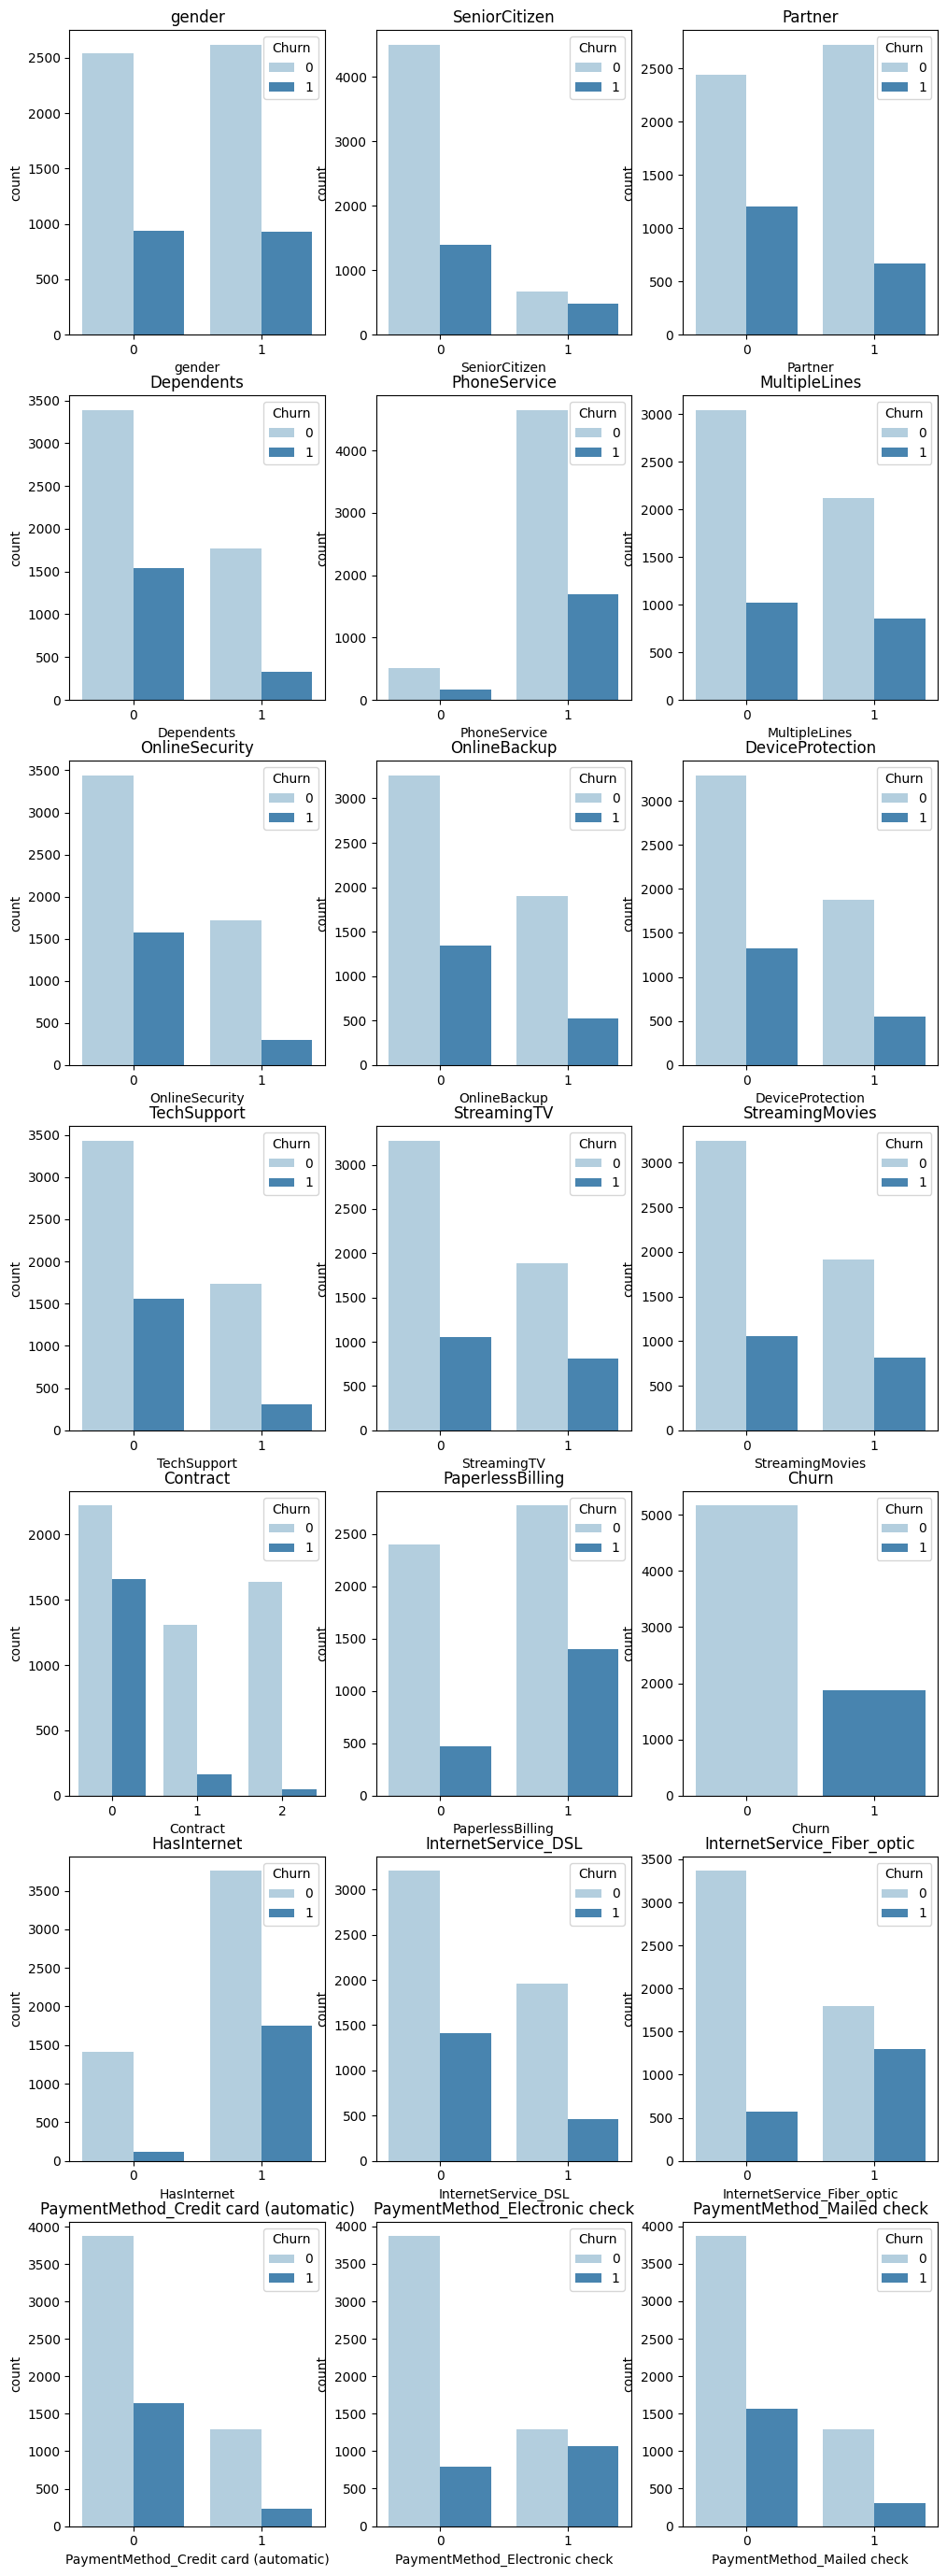

In [26]:
plot_categorical_to_target(df=dataset, categorical_values=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling',  
       'Churn', 'HasInternet', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'], target='Churn')

In [39]:
import matplotlib.pyplot as plt

def plot_correlations(df, target_column, figsize=(8, 6), color='orange'):
    """
    Plots correlation of all numerical features in `df` with respect to `target_column`.

    Parameters:
    - df: pandas DataFrame
    - target_column: str, name of the target column
    - figsize: tuple, size of the plot
    - color: str, color of the bars
    """
    # Ensure target is numeric (if not already)
    if df[target_column].dtype == 'object':
        df = df.copy()
        df[target_column] = df[target_column].astype('category').cat.codes
    
    # Compute correlation
    correlations = df.corr(numeric_only=True)[target_column].sort_values(ascending=False)

    # Drop self-correlation
    correlations = correlations.drop(target_column, errors='ignore')

    # Plot
    plt.figure(figsize=figsize)
    correlations.plot(kind='bar', color=color)
    plt.title(f'Correlation with {target_column}')
    plt.ylabel('Correlation coefficient')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


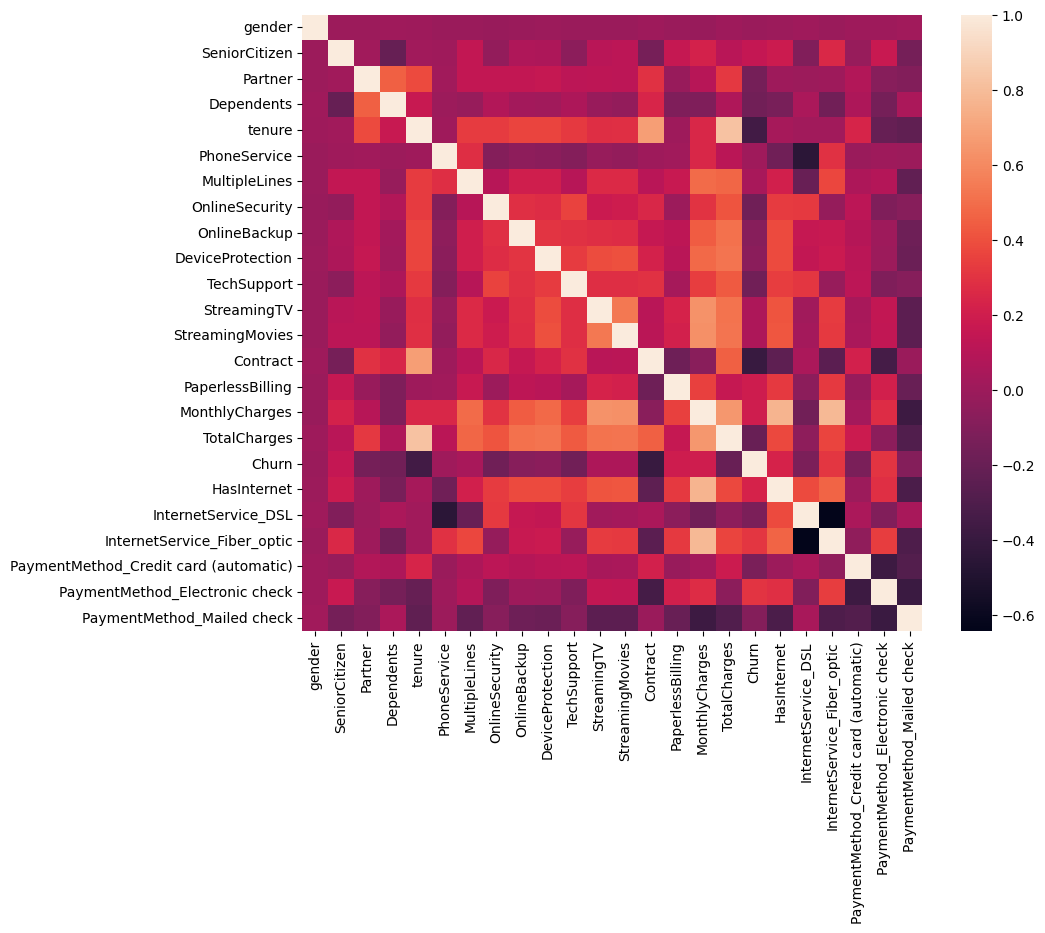

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=dataset.corr())
plt.show()

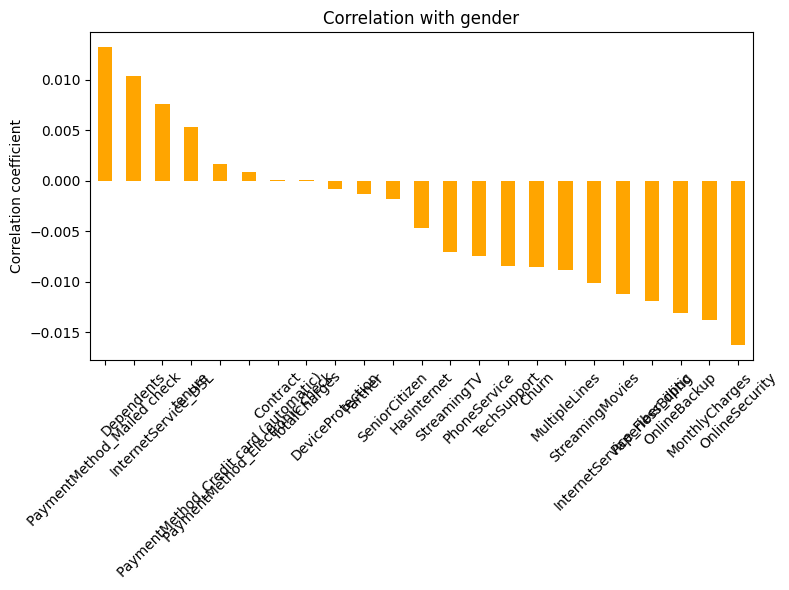

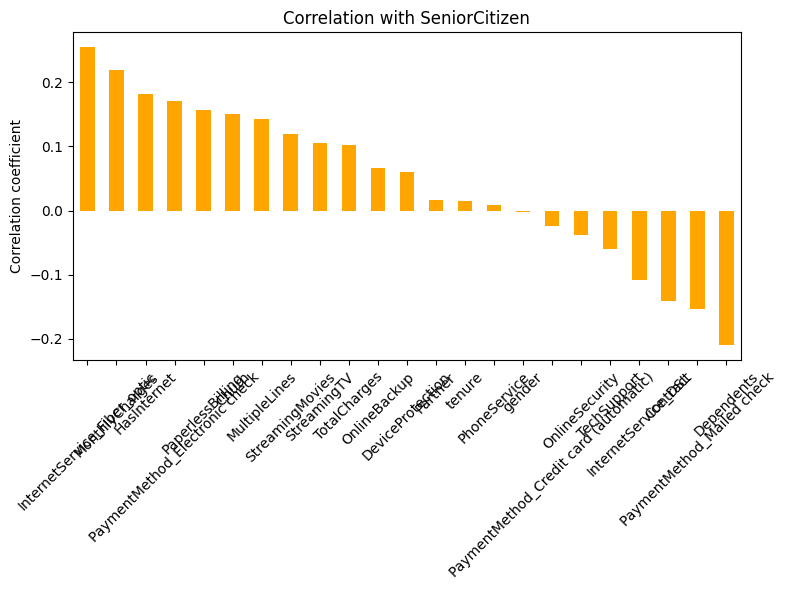

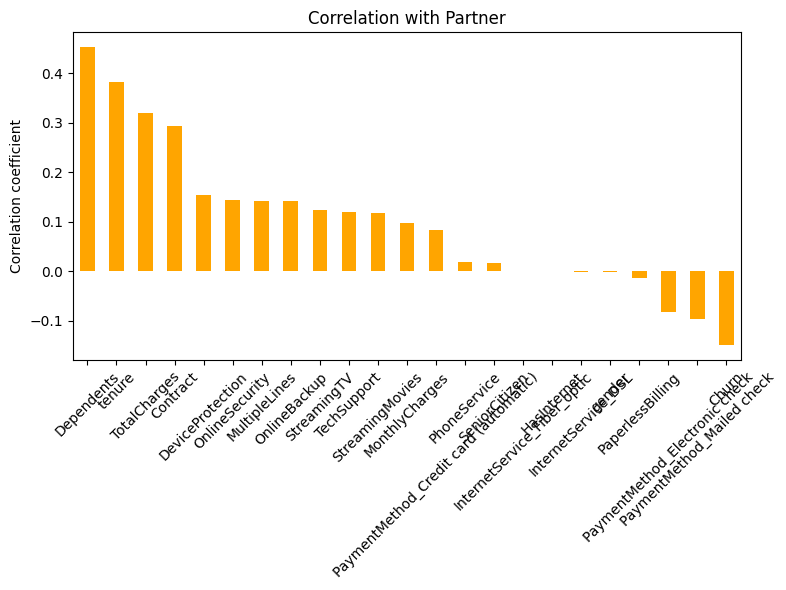

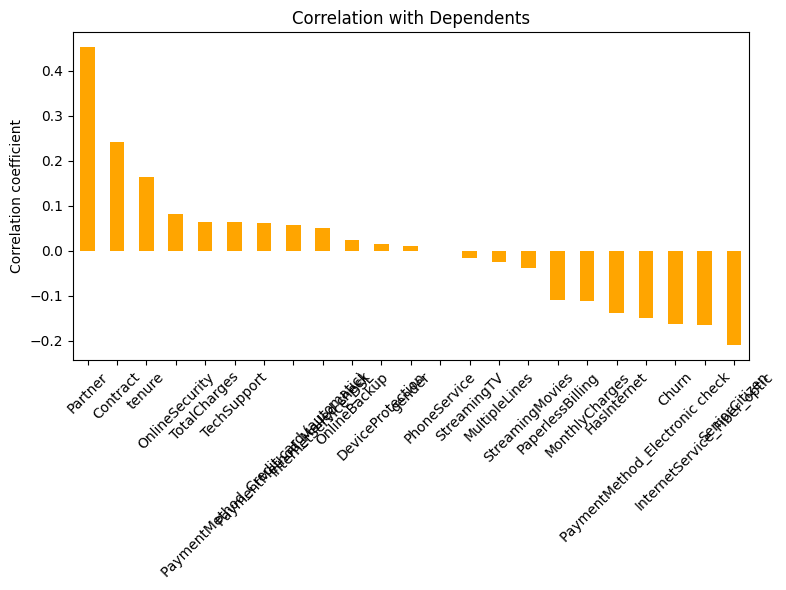

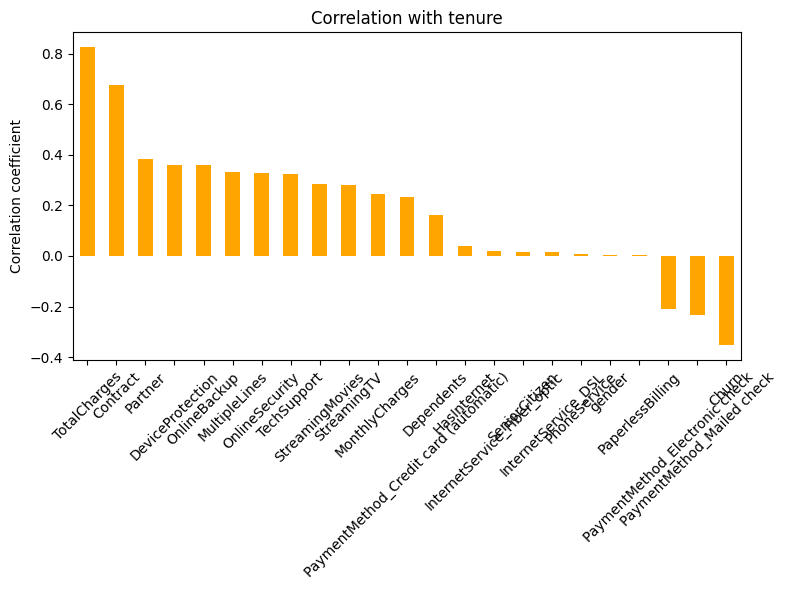

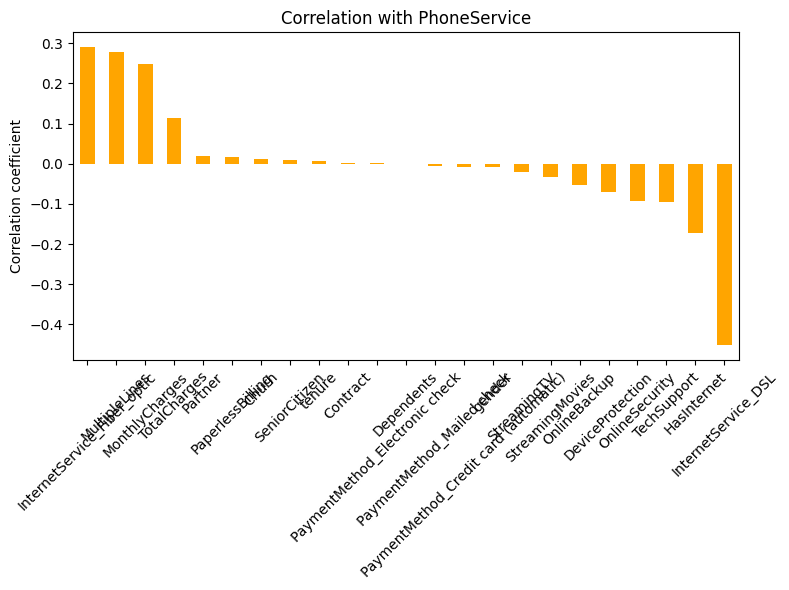

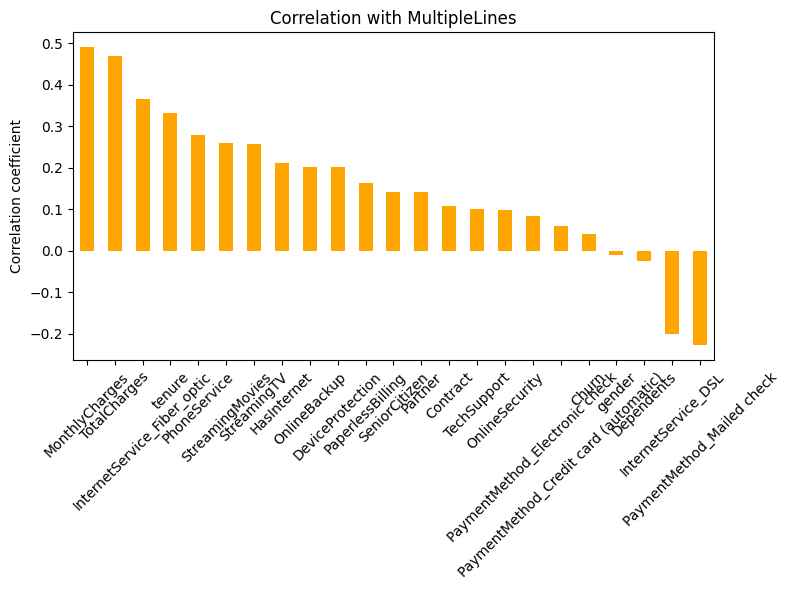

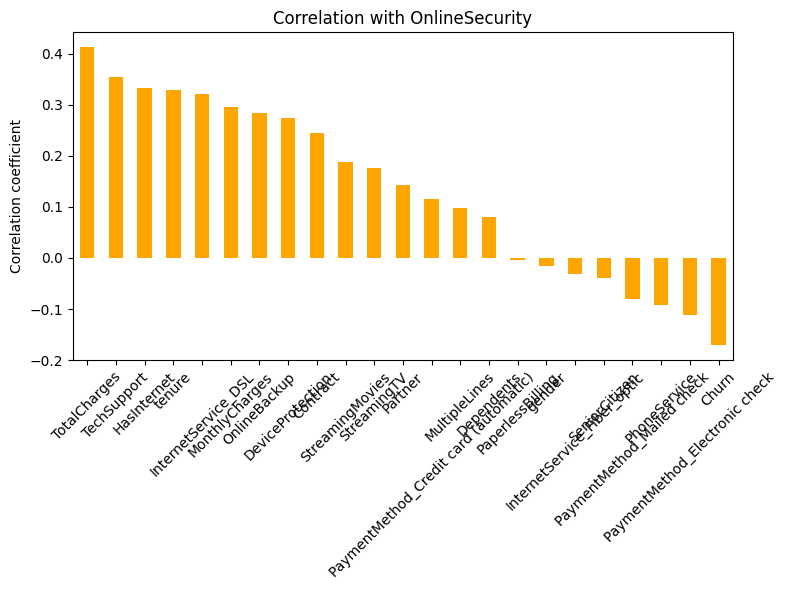

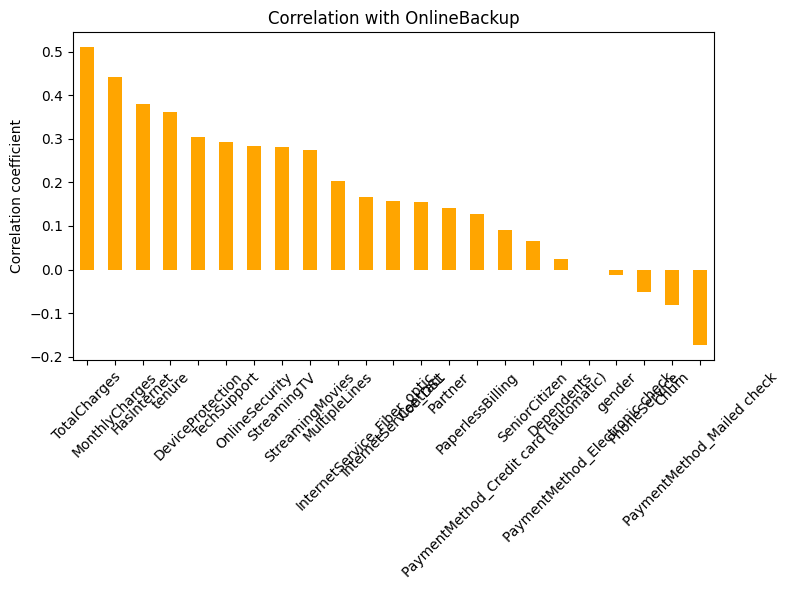

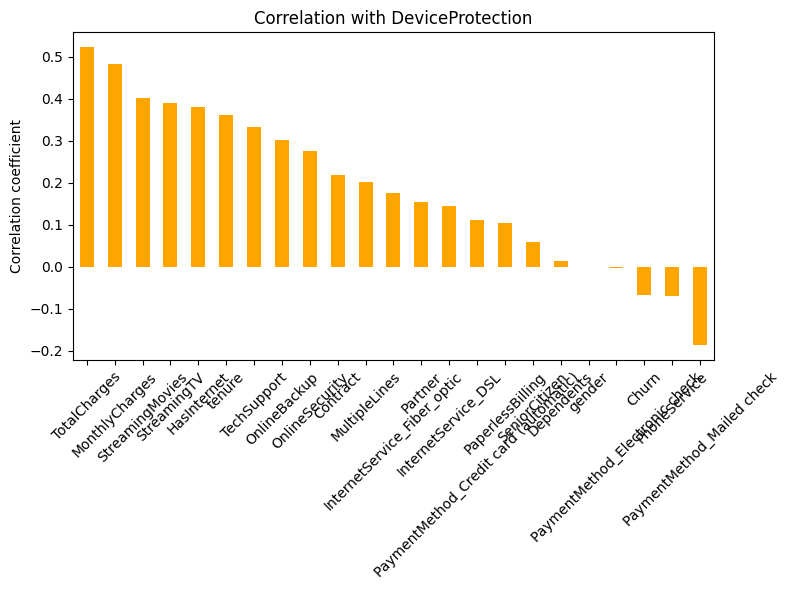

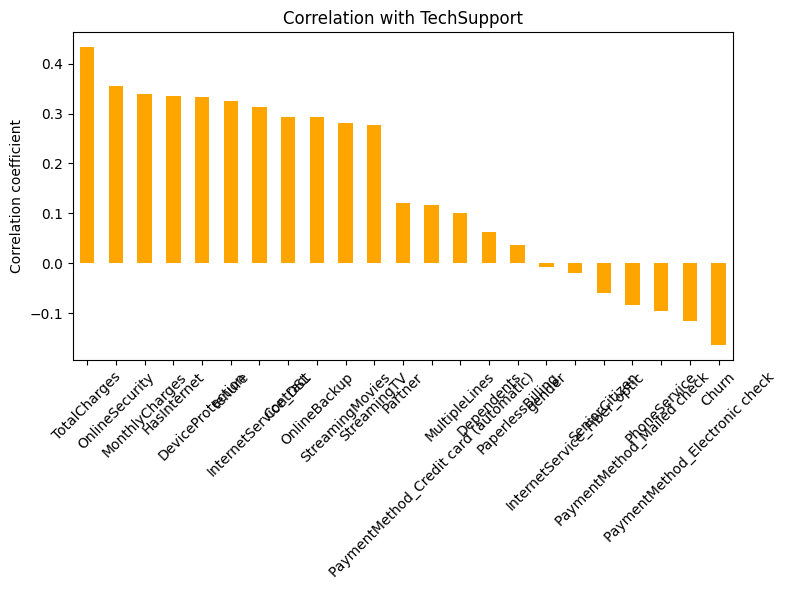

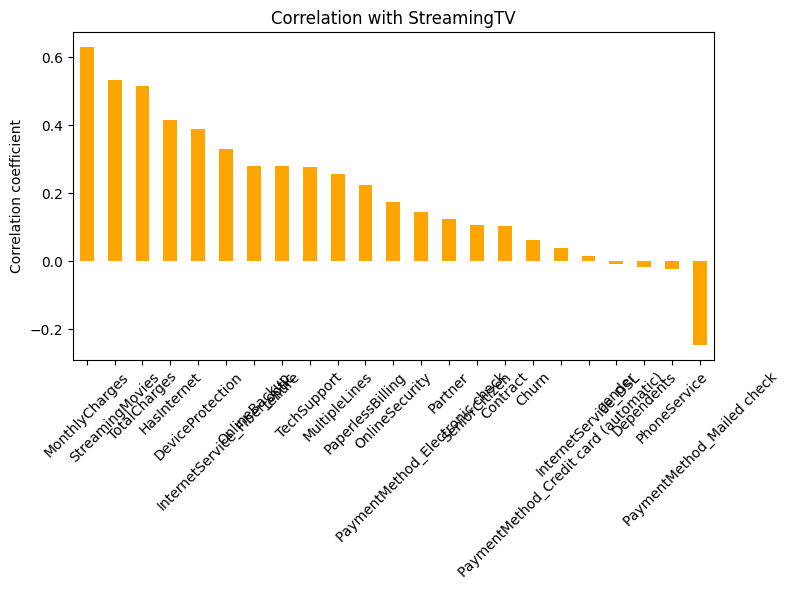

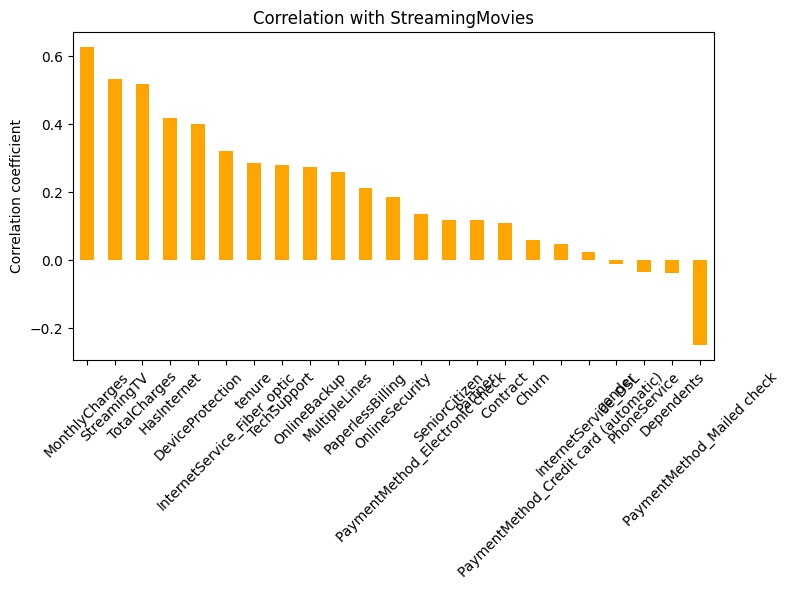

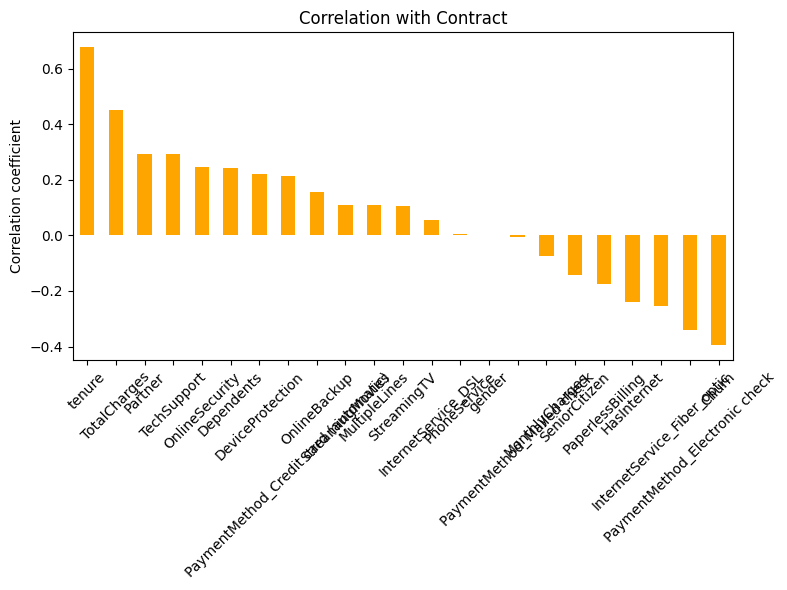

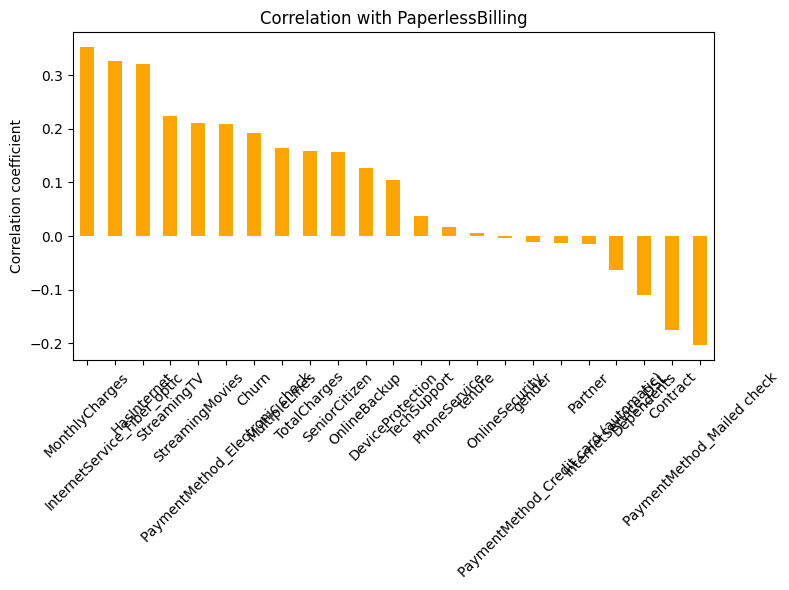

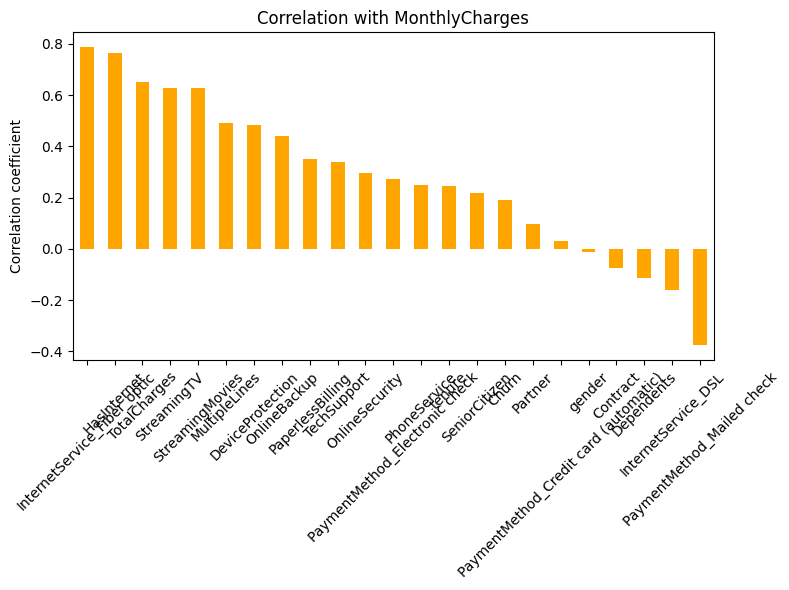

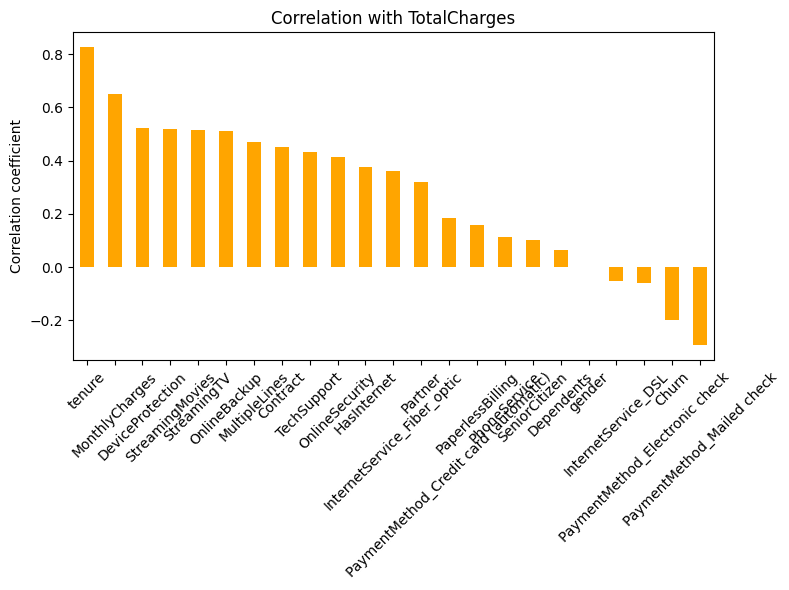

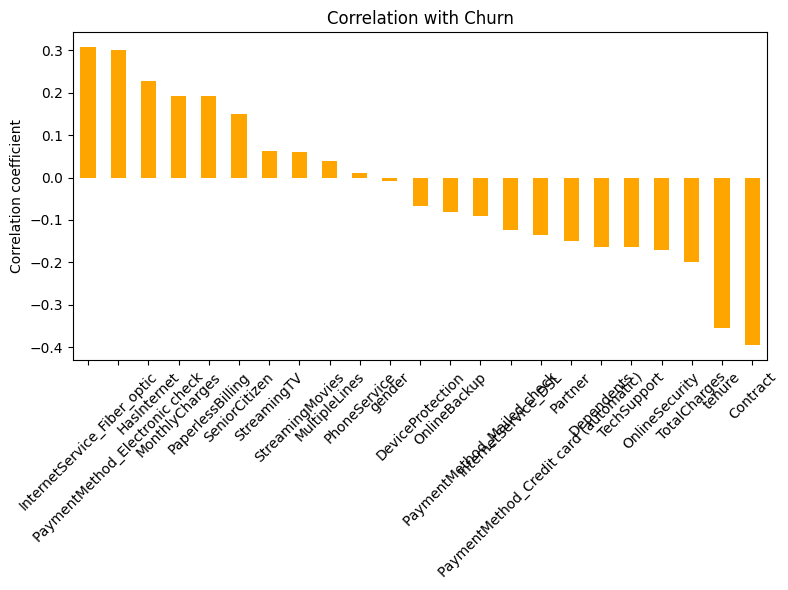

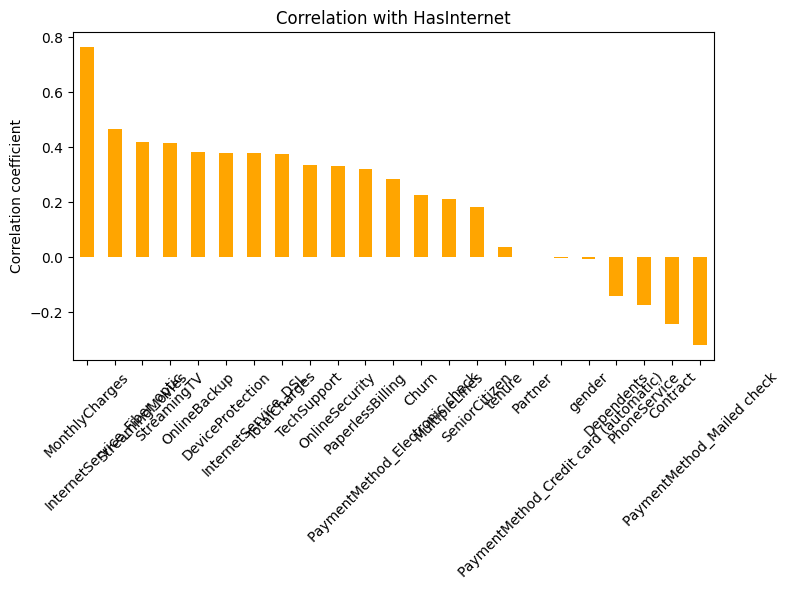

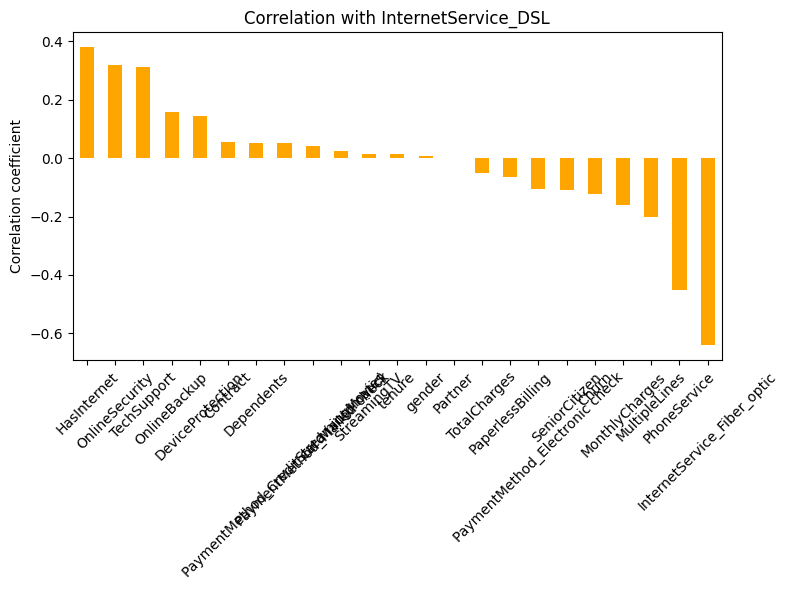

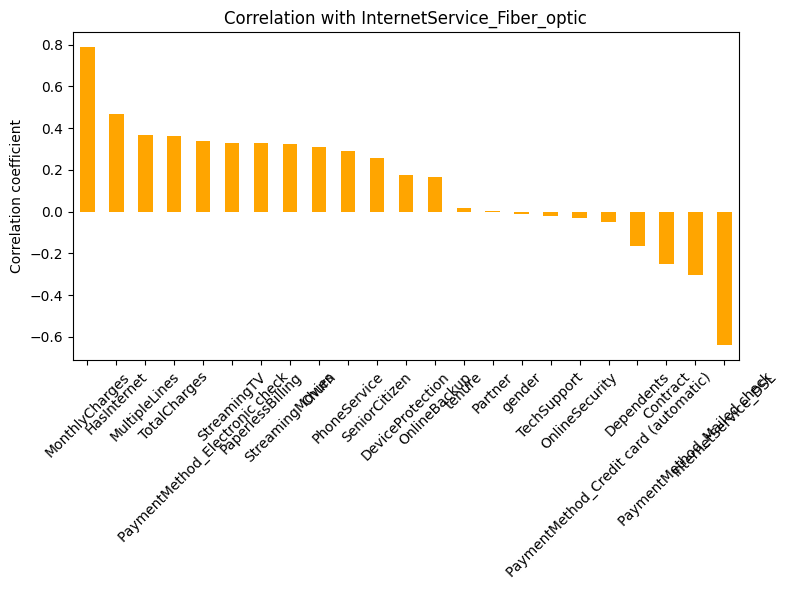

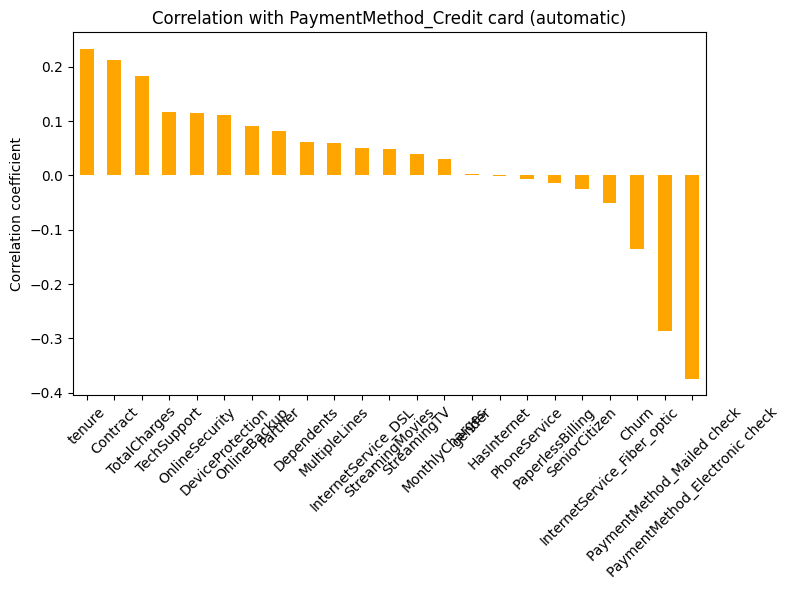

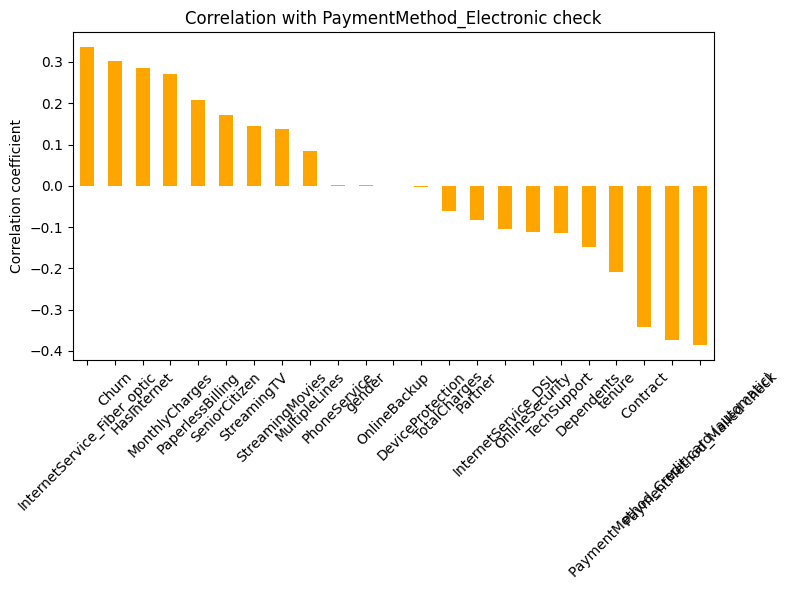

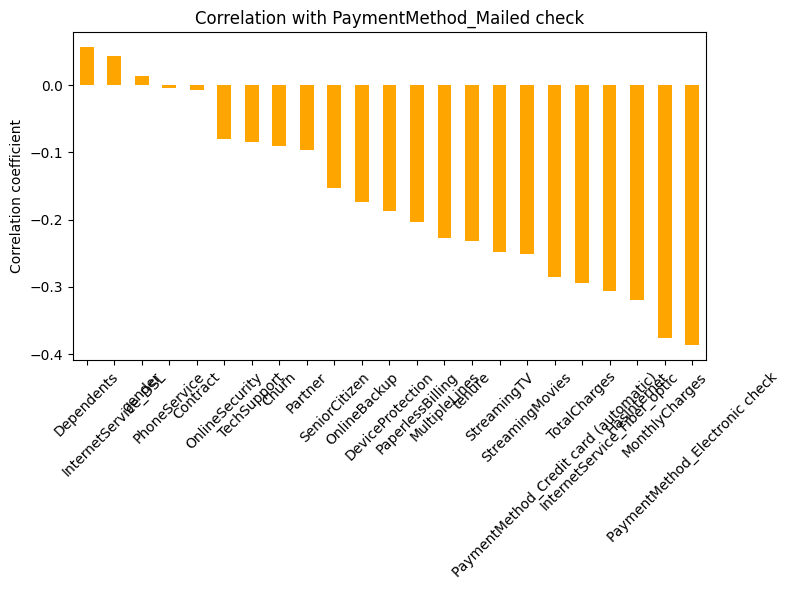

In [40]:
for col in dataset.columns:
    plot_correlations(dataset,target_column=col)

In [41]:
dataset.corr()['tenure']

gender                                   0.005285
SeniorCitizen                            0.015683
Partner                                  0.381912
Dependents                               0.163386
tenure                                   1.000000
PhoneService                             0.007877
MultipleLines                            0.332399
OnlineSecurity                           0.328297
OnlineBackup                             0.361138
DeviceProtection                         0.361520
TechSupport                              0.325288
StreamingTV                              0.280264
StreamingMovies                          0.285402
Contract                                 0.676734
PaperlessBilling                         0.004823
MonthlyCharges                           0.246862
TotalCharges                             0.825880
Churn                                   -0.354049
HasInternet                              0.037529
InternetService_DSL                      0.013786


In [44]:
dataset.corr()['TotalCharges']

gender                                   0.000048
SeniorCitizen                            0.102411
Partner                                  0.319072
Dependents                               0.064653
tenure                                   0.825880
PhoneService                             0.113008
MultipleLines                            0.469042
OnlineSecurity                           0.412619
OnlineBackup                             0.510100
DeviceProtection                         0.522881
TechSupport                              0.432868
StreamingTV                              0.515709
StreamingMovies                          0.519867
Contract                                 0.450306
PaperlessBilling                         0.157830
MonthlyCharges                           0.651065
TotalCharges                             1.000000
Churn                                   -0.199484
HasInternet                              0.374878
InternetService_DSL                     -0.052190


In [45]:
dataset.corr()['MonthlyCharges']

gender                                  -0.013779
SeniorCitizen                            0.219874
Partner                                  0.097825
Dependents                              -0.112343
tenure                                   0.246862
PhoneService                             0.248033
MultipleLines                            0.490912
OnlineSecurity                           0.296447
OnlineBackup                             0.441529
DeviceProtection                         0.482607
TechSupport                              0.338301
StreamingTV                              0.629668
StreamingMovies                          0.627235
Contract                                -0.072739
PaperlessBilling                         0.351930
MonthlyCharges                           1.000000
TotalCharges                             0.651065
Churn                                    0.192858
HasInternet                              0.763191
InternetService_DSL                     -0.161368


In [46]:
dataset.corr()['HasInternet']

gender                                  -0.004745
SeniorCitizen                            0.182519
Partner                                  0.000286
Dependents                              -0.138383
tenure                                   0.037529
PhoneService                            -0.171817
MultipleLines                            0.210794
OnlineSecurity                           0.332799
OnlineBackup                             0.380990
DeviceProtection                         0.380151
TechSupport                              0.335695
StreamingTV                              0.414951
StreamingMovies                          0.418450
Contract                                -0.241574
PaperlessBilling                         0.320592
MonthlyCharges                           0.763191
TotalCharges                             0.374878
Churn                                    0.227578
HasInternet                              1.000000
InternetService_DSL                      0.379912


In [47]:
dataset.corr()['InternetService_Fiber_optic']

gender                                  -0.011189
SeniorCitizen                            0.254923
Partner                                  0.001235
Dependents                              -0.164101
tenure                                   0.017930
PhoneService                             0.290183
MultipleLines                            0.366420
OnlineSecurity                          -0.030506
OnlineBackup                             0.165940
DeviceProtection                         0.176356
TechSupport                             -0.020299
StreamingTV                              0.329744
StreamingMovies                          0.322457
Contract                                -0.252733
PaperlessBilling                         0.326470
MonthlyCharges                           0.787195
TotalCharges                             0.360769
Churn                                    0.307463
HasInternet                              0.465736
InternetService_DSL                     -0.641636


In [54]:
def corr_pairs(dataset,threshold=0.8):
    corr_matrix = dataset.corr().abs()
    high_corr = np.where(corr_matrix > threshold)
    high_corr_pairs = [(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr) if x != y and x < y]
    print(high_corr_pairs)

In [57]:
corr_pairs(dataset,0.78)

[('tenure', 'TotalCharges'), ('MonthlyCharges', 'InternetService_Fiber_optic')]


- **`TotalCharges` vs `tenure`: 0.82+**
- **`MonthlyCharges` vs `HasInternet`: 0.76+**
- **`MonthlyCharges` vs `InternetService_Fiber_optic`: 0.78+**


#### **Dropping `TotalCharges`**

In [60]:
dataset.drop('TotalCharges',axis=1,inplace=True)

In [61]:
dataset.shape

(7032, 23)

In [62]:
dataset.to_csv('../datasets/processed/Telco-customer-churn-final-v1.csv',index=False)

## **Feature Selection Completed**